In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')

test_df=pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [3]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
def detect_data_types(df):
    """
    Detect whether the data type for each column in the DataFrame is discrete, continuous, or unknown.

    Parameters:
        df (pd.DataFrame): DataFrame containing the columns to analyze.

    Returns:
        dict: A dictionary where keys are column names and values are the data types ('discrete', 'continuous', 'unknown').
    """
    discrete_text_container=[]
    discrete_numeric_container=[]
    continuous_container=[]
    unknown_container=[]
    
    

    for column in df.columns:
        # Drop NaN values for analysis
        col_data = df[column].dropna()
        
        # Get unique value counts
        unique_values = col_data.nunique()

        # Check if the column is numerical (int or float)
        if col_data.dtype in ['int64', 'float64']:
            # For integer-based data with few unique values, it's likely discrete
            if col_data.dtype == 'int64' and unique_values / len(col_data) < 0.05:
                discrete_numeric_container.append(column)
            else:
                continuous_container.append(column)
                
        
        # Check if the column is categorical/text data
        elif col_data.dtype == 'object' or col_data.dtype.name == 'category':
            discrete_text_container.append(column)
        
        # If there are very few unique values compared to the length, treat it as discrete
        elif unique_values / len(col_data) < 0.05:
            discrete_text_container.append(column)
        
        # If the data doesn't fit into any category, mark it as 'unknown'
        else:
            unknown_container.append(column)
    
    return [discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
            



def dataset_analysis(df,target_column=None,type=None):


    # Total rows
    total_rows = len(df)
    # Count of unique rows
    unique_rows = len(df.drop_duplicates())
    # Count of duplicate rows
    duplicate_rows = total_rows - unique_rows
    # Calculate percentages
    unique_percentage = (unique_rows / total_rows) * 100
    duplicate_percentage = (duplicate_rows / total_rows) * 100

    print('*'*80)
    print('Basic Analysis Of Dataframe')
    print('*'*80)

    
    print('='*50)
    print('Dataset Shape (Rows & Columns)')
    print('='*50)
    print('Rows :-',df.shape[0])
    print('Columns :-',df.shape[1])
    print(f"Unique Rows: {unique_rows} ({unique_percentage:.2f}%)")
    print(f"Duplicate Rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")


    # Data type-wise column count
    print("\n" + "="*50)
    print("Data Type Wise Column Count")
    print("="*50)
    dtype_count = df.dtypes.value_counts()
    print(dtype_count)
    


    # Discrete And Continous Data Analysis
    print("\n" + "="*50)
    print("Discrete And Continous Data Analysis")
    print("="*50)
    dtype_count = df.columns
    dectectDataTypeObj=detect_data_types(df)

     # Extract containers
    discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

    #[discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
    
    if(len(dectectDataTypeObj)>0):

        #Discrete Text Columns
        if len(dectectDataTypeObj[0])>0:
            print('Discrete Text Columns :',', '.join(discrete_text_columns))
        else:
            print('Discrete Text Columns :','-----')

        print('\n')

        #Discrete Numeric Columns
        if len(dectectDataTypeObj[1])>0:
            print('Discrete Numeric Columns :',', '.join(discrete_numeric_columns) )
        else:
            print('Discrete Numeric Columns :','-----')
        print('\n')

        #Continuous  Columns
        if len(dectectDataTypeObj[2])>0:
            print('Continuous Columns :',', '.join(continuous_columns))
        else:
            print('Continuous Columns :','-----')

        print('\n')
        
        #Unknown Columns
        if len(dectectDataTypeObj[3])>0:
            print('Unknown Columns :',', '.join(unknown_columns))
        else:
            print('Unknown Columns :','-----')

        

    if len(continuous_columns) > 0:
        

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()
        
        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    #flag = "No transformation needed"
                    flag=""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")

        
        
        
            
    else:
        print("No numeric columns available for Skewness Analysis.")


    # Additional information aboutConstant unique values and example entries
    print("\n" + "="*50)
    print("Constant Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) == 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    

    # Additional information about unique values and example entries
    print("\n" + "="*50)
    print("Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) != 1:
                if len(df[col].unique())<20:
                    print(f"{col}: {sorted(df[col].unique())}\n")
                else:
                    print(f"{col}: This Column have More than 20 uniques values \n")
    
    # Check for null (missing) values and their counts
    print("\n" + "="*50)
    print("Columns with Null Values and Null Value Counts")
    print("="*50)
    null_columns = df.columns[df.isnull().any()]
    if null_columns.empty:
        print("No columns contain null values.")
    else:
        for col in null_columns:
            null_count = df[col].isnull().sum()
            print(f"{col}: {null_count} null values")

    # Check for Imbalance in Custom Target Column
    if target_column and type!='regression':
        print(f"\n{'='*50}\nImbalance Analysis for '{target_column}'\n{'='*50}")
        target_counts = df[target_column].value_counts()
        target_percentage = target_counts / len(df) * 100
    
        print(f"Percentage Distribution:\n{target_percentage}\n")
    
        # Check for Imbalance
        imbalance_ratio = target_counts.min() / target_counts.max()
        print(f"The dataset is {'imbalanced' if imbalance_ratio < 0.25 else 'balanced'} with respect to '{target_column}'.")

      
    
dataset_analysis(train_df,target_column='class',type="classification") 

********************************************************************************
Basic Analysis Of Dataframe
********************************************************************************
Dataset Shape (Rows & Columns)
Rows :- 3116945
Columns :- 22
Unique Rows: 3116945 (100.00%)
Duplicate Rows: 0 (0.00%)

Data Type Wise Column Count
object     18
float64     3
int64       1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : class, cap-shape, cap-surface, cap-color, does-bruise-or-bleed, gill-attachment, gill-spacing, gill-color, stem-root, stem-surface, stem-color, veil-type, veil-color, has-ring, ring-type, spore-print-color, habitat, season


Discrete Numeric Columns : -----


Continuous Columns : id, cap-diameter, stem-height, stem-width


Unknown Columns : -----

Skewness of Numerical Columns
id: -0.00 -> Approximately Symmetric. 
cap-diameter: 3.97 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
stem-height: 1.93 -

<h1>Key Insights and Conclusions</h1>
    <div class="section">
        <h2>Dataset Overview</h2>
        <ul>
            <li>The dataset has <strong>3,116,945 rows</strong> and <strong>22 columns</strong>, with no duplicate rows.</li>
            <li>All rows are unique (<strong>100%</strong>).</li>
        </ul>
    </div>
    <div class="section">
        <h2>Column Data Types</h2>
        <ul>
            <li>The dataset consists mainly of categorical data (<strong>object: 18 columns</strong>).</li>
            <li>There are <strong>4 numerical columns</strong> (3 float and 1 integer).</li>
        </ul>
    </div>
    <div class="section">
        <h2>Numerical Columns</h2>
        <ul>
            <li><strong>Skewness:</strong></li>
            <ul>
                <li><strong>cap-diameter</strong>, <strong>stem-height</strong>, and <strong>stem-width</strong> show strong positive skewness, indicating the need for transformation (e.g., log or square root) to normalize these distributions.</li>
                <li><strong>id</strong> is approximately symmetric.</li>
            </ul>
        </ul>
    </div>
    <div class="section">
        <h2>Categorical Columns</h2>
        <ul>
            <li>The <strong>class</strong> column is binary: <code>'e'</code> and <code>'p'</code>.</li>
            <li>Other categorical columns have more than 20 unique values, except <strong>season</strong> (4 unique values: <code>'a'</code>, <code>'s'</code>, <code>'u'</code>, <code>'w'</code>).</li>
        </ul>
    </div>
    <div class="section">
        <h2>Missing Values</h2>
        <ul>
            <li>Several columns have a significant proportion of null values:</li>
            <ul>
                <li>Columns like <strong>stem-root</strong>, <strong>veil-type</strong>, and <strong>spore-print-color</strong> have over 90% missing values, potentially warranting removal or imputation strategies.</li>
                <li>Columns like <strong>cap-diameter</strong>, <strong>cap-shape</strong>, and <strong>does-bruise-or-bleed</strong> have minimal missing values (<0.01%).</li>
            </ul>
        </ul>
    </div>
    <div class="section">
        <h2>Class Balance</h2>
        <ul>
            <li>The <strong>class</strong> column is reasonably balanced with <code>'p'</code> at ~54.71% and <code>'e'</code> at ~45.29%.</li>
        </ul>
    </div>
    <div class="recommendations section">
        <h2>Recommendations</h2>
        <ul>
            <li><strong>Skewness Handling:</strong> Apply transformations (log, square root) for skewed numerical columns to improve model performance.</li>
            <li><strong>Missing Data:</strong></li>
            <ul>
                <li>Consider dropping columns with excessive nulls (e.g., <strong>stem-root</strong>, <strong>veil-type</strong>).</li>
                <li>Use imputation for columns with minimal nulls (e.g., <strong>cap-diameter</strong>).</li>
            </ul>
            <li><strong>Feature Engineering:</strong> Reduce high-cardinality categorical columns using grouping or dimensionality reduction.</li>
            <li><strong>Class Label:</strong> The <strong>class</strong> column is balanced, so no need for oversampling/undersampling.</li>
        </ul>
    </div>

In [5]:
# Calculate the percentage of null values for each column
total_rows = len(train_df)
null_percentage = (train_df.isnull().sum() / total_rows) * 100

# Display the percentages
print("Percentage of Null Values per Column:")
print(null_percentage.sort_values(ascending=False))

Percentage of Null Values per Column:
veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
cap-diameter             0.000128
id                       0.000000
stem-width               0.000000
class                    0.000000
stem-height              0.000000
season                   0.000000
dtype: float64


In [6]:
columns_with_nulls = ["veil-type","spore-print-color","stem-root","veil-color","stem-surface","ring-type","gill-spacing","cap-surface","gill-attachment"]
train_df=train_df.drop(columns_with_nulls,axis=1)
test_df=test_df.drop(columns_with_nulls,axis=1)

In [7]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,e,8.80,f,u,f,w,4.51,15.39,w,f,d,a
1,1,p,4.51,x,o,f,n,4.79,6.48,o,t,d,w
2,2,e,6.94,f,b,f,w,6.85,9.93,n,f,l,w
3,3,e,3.88,f,g,f,g,4.16,6.53,w,f,d,u
4,4,e,5.85,x,w,f,w,3.37,8.36,w,f,g,a


In [8]:
train_df.isnull().sum().sort_values(ascending=False)

gill-color              57
habitat                 45
cap-shape               40
stem-color              38
has-ring                24
cap-color               12
does-bruise-or-bleed     8
cap-diameter             4
id                       0
class                    0
stem-height              0
stem-width               0
season                   0
dtype: int64

In [9]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check for object type columns
            mode_value = df[column].mode()[0]  # Get the mode of the column
            df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode
        elif df[column].dtype in ['int64', 'float64']:  # Check for numeric type columns
            median_value = df[column].median()  # Get the median of the column
            df[column].fillna(median_value, inplace=True)  # Fill missing values with median

    return df


In [10]:
train_df=fill_missing_values(train_df)
test_df=fill_missing_values(test_df)

In [11]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,e,8.80,f,u,f,w,4.51,15.39,w,f,d,a
1,1,p,4.51,x,o,f,n,4.79,6.48,o,t,d,w
2,2,e,6.94,f,b,f,w,6.85,9.93,n,f,l,w
3,3,e,3.88,f,g,f,g,4.16,6.53,w,f,d,u
4,4,e,5.85,x,w,f,w,3.37,8.36,w,f,g,a


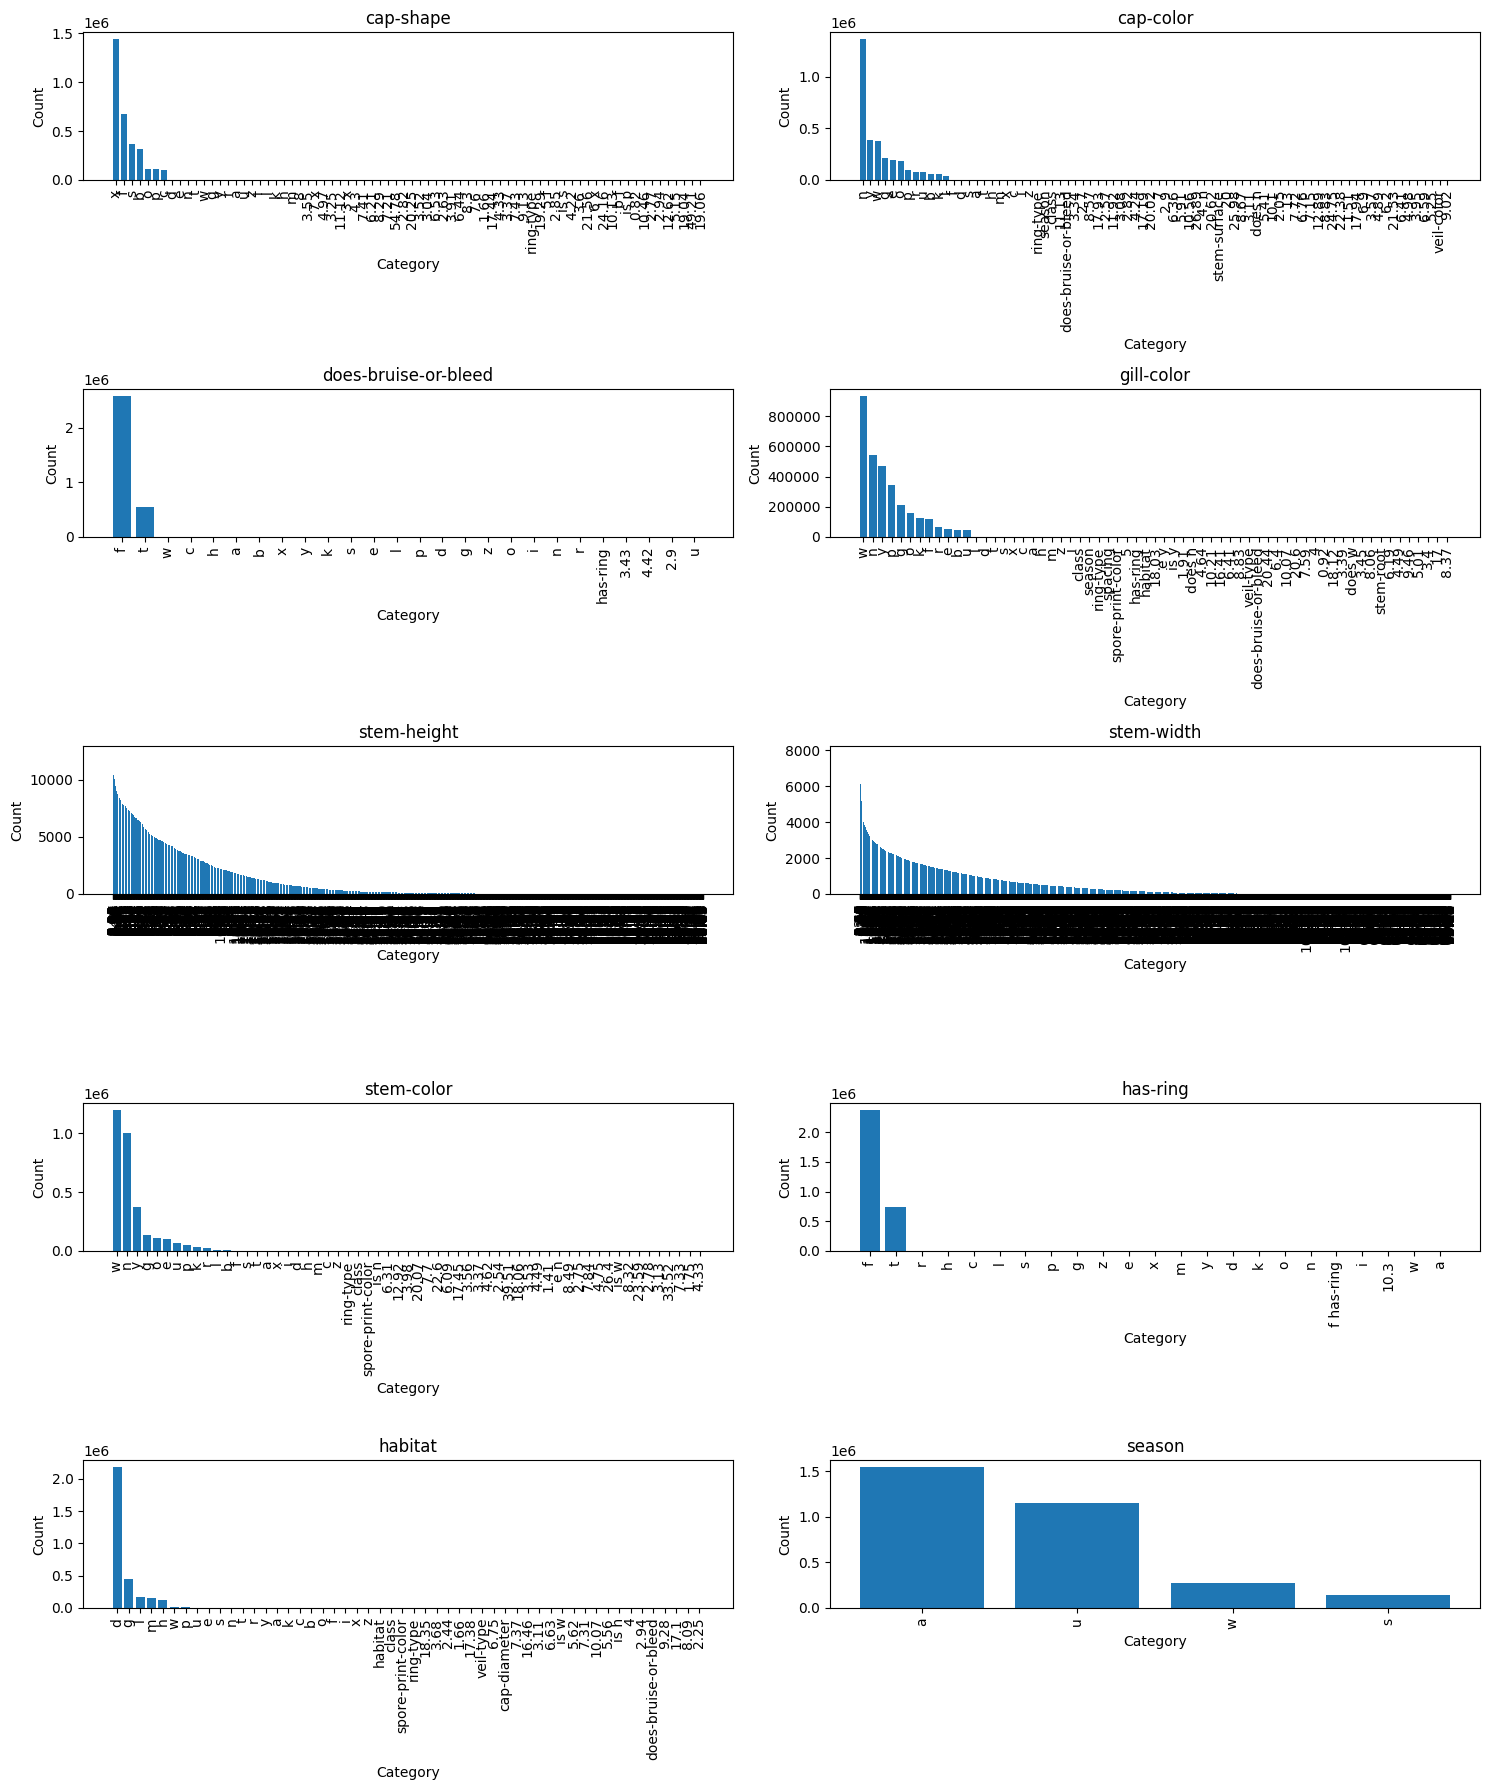

In [12]:
columns_with_more_than_20_unique_values = [
    'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 
    'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season'
]

# Create subplots (adjust to the number of columns you actually have)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()  

for i, col in enumerate(columns_with_more_than_20_unique_values):
    # Plot only if i is less than 10 (because you have 10 columns)
    if i < len(columns_with_more_than_20_unique_values):
        value_counts = train_df[col].value_counts()
        axes[i].bar(value_counts.index.astype(str), value_counts.values)
        axes[i].set_title(col)
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
from tqdm import tqdm

def check_values(x, most_unique_array):
    if x in most_unique_array:
        return x
    else:
        return 'other'

# List of columns
columns_with_more_than_20_unique_values = [
    'cap-shape',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-color',
    'has-ring',
    'habitat',
    'season'
]

# Iterate with progress tracking using tqdm
for col in tqdm(columns_with_more_than_20_unique_values, desc="Processing columns"):

    print(f'--------started {col} ----------------------')
    # Get value counts and filter for frequent values (>150 occurrences)
    filtered_counts = train_df[col].value_counts().reset_index()
    filtered_counts.columns = ['value', 'count']  # Rename columns for clarity
    most_unique_array = filtered_counts[filtered_counts['count'] > 150]['value'].values
    
    # Update train and test DataFrame columns
    train_df[col] = train_df[col].apply(lambda x: check_values(x, most_unique_array))
    test_df[col] = test_df[col].apply(lambda x: check_values(x, most_unique_array))

Processing columns:   0%|          | 0/8 [00:00<?, ?it/s]

--------started cap-shape ----------------------


Processing columns:  12%|█▎        | 1/8 [00:31<03:42, 31.85s/it]

--------started cap-color ----------------------


Processing columns:  25%|██▌       | 2/8 [01:04<03:13, 32.20s/it]

--------started does-bruise-or-bleed ----------------------


Processing columns:  38%|███▊      | 3/8 [01:35<02:37, 31.57s/it]

--------started gill-color ----------------------


Processing columns:  50%|█████     | 4/8 [02:07<02:07, 31.88s/it]

--------started stem-color ----------------------


Processing columns:  62%|██████▎   | 5/8 [02:39<01:36, 32.07s/it]

--------started has-ring ----------------------


Processing columns:  75%|███████▌  | 6/8 [03:10<01:03, 31.65s/it]

--------started habitat ----------------------


Processing columns:  88%|████████▊ | 7/8 [03:42<00:31, 31.70s/it]

--------started season ----------------------


Processing columns: 100%|██████████| 8/8 [04:13<00:00, 31.73s/it]


In [14]:
train_df.shape

(3116945, 13)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns_to_encode = ['cap-shape',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-color',
    'has-ring',
    'habitat',
    'season']

# Apply LabelEncoder to the selected columns
train_df[columns_to_encode] = train_df[columns_to_encode].apply(encoder.fit_transform)
train_df['class'] = encoder.fit_transform(train_df['class'])
test_df[columns_to_encode] = test_df[columns_to_encode].apply(encoder.fit_transform)


In [16]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,0,8.80,2,10,0,11,4.51,15.39,12,0,0,0
1,1,1,4.51,7,6,0,5,4.79,6.48,7,2,0,3
2,2,0,6.94,2,0,0,11,6.85,9.93,6,0,3,3
3,3,0,3.88,2,2,0,3,4.16,6.53,12,0,0,2
4,4,0,5.85,7,11,0,11,3.37,8.36,12,0,1,0


In [17]:
test_df.head()

,id,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,3116945,8.64,7,5,2,11,11.13,17.12,12,2,0,0
1,3116946,6.90,3,6,0,12,1.27,10.75,6,0,0,0
2,3116947,2.00,0,5,0,5,6.18,3.14,6,0,0,1
3,3116948,3.47,7,5,0,5,4.98,8.51,12,2,0,2
4,3116949,6.17,7,12,0,12,6.73,13.70,13,2,0,2


In [18]:
train_df.corr()

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
id,1.000000,-0.000136,0.000291,0.000042,-0.000779,0.000723,-0.000188,0.000124,0.000396,-0.000783,-0.000613,0.000150,0.001095
class,-0.000136,1.000000,-0.162626,-0.101995,0.053140,-0.037554,-0.072455,-0.049740,-0.169807,-0.079961,0.049632,-0.024654,-0.063554
cap-diameter,0.000291,-0.162626,1.000000,0.112902,0.041557,0.239087,0.218221,0.364063,0.746316,0.038754,0.098923,-0.136582,0.019936
cap-shape,0.000042,-0.101995,0.112902,1.000000,0.009725,0.186963,0.113039,0.028539,0.158077,-0.010203,0.071004,-0.137261,-0.031301
cap-color,-0.000779,0.053140,0.041557,0.009725,1.000000,0.029827,0.130689,-0.023730,0.027574,0.272613,0.074297,0.043311,-0.006710
does-bruise-or-bleed,0.000723,-0.037554,0.239087,0.186963,0.029827,1.000000,0.026791,0.122227,0.271237,-0.042469,0.042160,-0.119139,-0.057611
gill-color,-0.000188,-0.072455,0.218221,0.113039,0.130689,0.026791,1.000000,0.128814,0.143781,0.149984,-0.032150,-0.060118,-0.005227
stem-height,0.000124,-0.049740,0.364063,0.028539,-0.023730,0.122227,0.128814,1.000000,0.356225,0.125384,0.301541,-0.066876,-0.029250
stem-width,0.000396,-0.169807,0.746316,0.158077,0.027574,0.271237,0.143781,0.356225,1.000000,0.093280,0.041101,-0.133317,-0.003686
stem-color,-0.000783,-0.079961,0.038754,-0.010203,0.272613,-0.042469,0.149984,0.125384,0.093280,1.000000,0.172847,0.030875,-0.015617


In [19]:
x=train_df[['cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-height','stem-width','stem-color','has-ring','habitat','season']]
y=train_df['class']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()

# Fit and transform the data
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
y_train = y_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape
y_test = y_test.values.reshape(-1, 1)

In [21]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (2088353, 11)
x_test (1028592, 11)
y_train (2088353, 1)
y_test (1028592, 1)


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras import backend as K
from sklearn.metrics import matthews_corrcoef

def mcc_metric(y_true, y_pred):

    y_pred_pos = K.round(y_pred)  # Convert probabilities to 0 or 1
    y_true = K.cast(y_true, dtype=tf.float32)
    y_pred_pos = K.cast(y_pred_pos, dtype=tf.float32)
    
    # Calculate components
    tp = K.sum(y_true * y_pred_pos)
    tn = K.sum((1 - y_true) * (1 - y_pred_pos))
    fp = K.sum((1 - y_true) * y_pred_pos)
    fn = K.sum(y_true * (1 - y_pred_pos))
    
    # MCC calculation
    numerator = tp * tn - fp * fn
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) + K.epsilon())
    mcc = numerator / (denominator + K.epsilon())
    
    return mcc

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',mcc_metric])

In [26]:
history=model.fit(x_train,y_train,validation_split=0.3,epochs=5,batch_size=20,verbose=1)

Epoch 1/5
73093/73093 ━━━━━━━━━━━━━━━━━━━━ 151s 2ms/step - accuracy: 0.9016 - loss: 0.2508 - mcc_metric: 0.8015 - val_accuracy: 0.9556 - val_loss: 0.1413 - val_mcc_metric: 0.9106
Epoch 2/5
73093/73093 ━━━━━━━━━━━━━━━━━━━━ 149s 2ms/step - accuracy: 0.9596 - loss: 0.1322 - mcc_metric: 0.9183 - val_accuracy: 0.9614 - val_loss: 0.1249 - val_mcc_metric: 0.9220
Epoch 3/5
73093/73093 ━━━━━━━━━━━━━━━━━━━━ 149s 2ms/step - accuracy: 0.9643 - loss: 0.1183 - mcc_metric: 0.9279 - val_accuracy: 0.9656 - val_loss: 0.1131 - val_mcc_metric: 0.9304
Epoch 4/5
73093/73093 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.9661 - loss: 0.1124 - mcc_metric: 0.9315 - val_accuracy: 0.9665 - val_loss: 0.1107 - val_mcc_metric: 0.9320
Epoch 5/5
73093/73093 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.9673 - loss: 0.1078 - mcc_metric: 0.9338 - val_accuracy: 0.9671 - val_loss: 0.1090 - val_mcc_metric: 0.9334


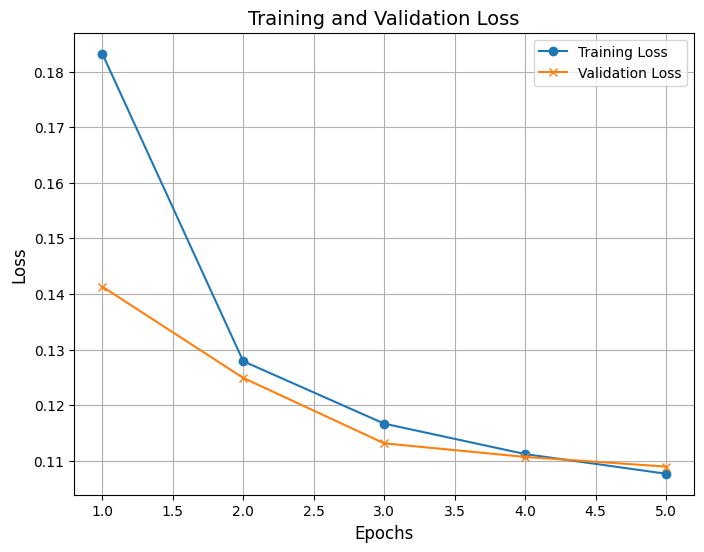

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.show()

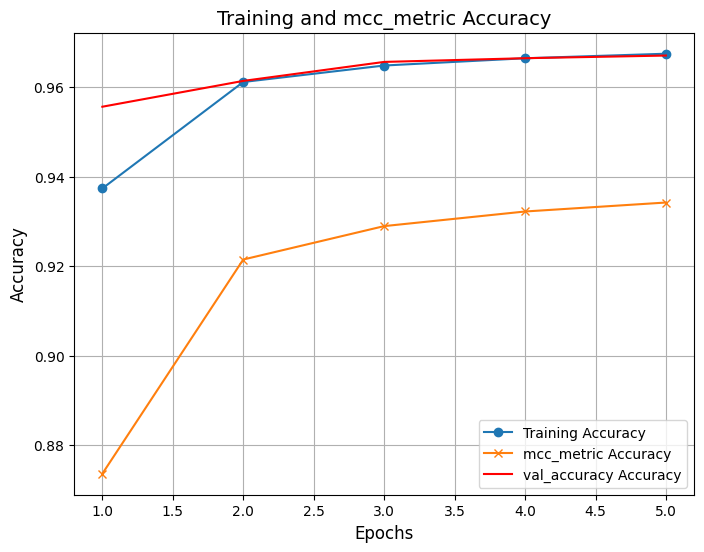

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['mcc_metric']
val_accuracy1 = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='mcc_metric Accuracy', marker='x')
plt.plot(epochs, val_accuracy1,color='red', label='val_accuracy Accuracy')

plt.title('Training and mcc_metric Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid()
plt.show()

32144/32144 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


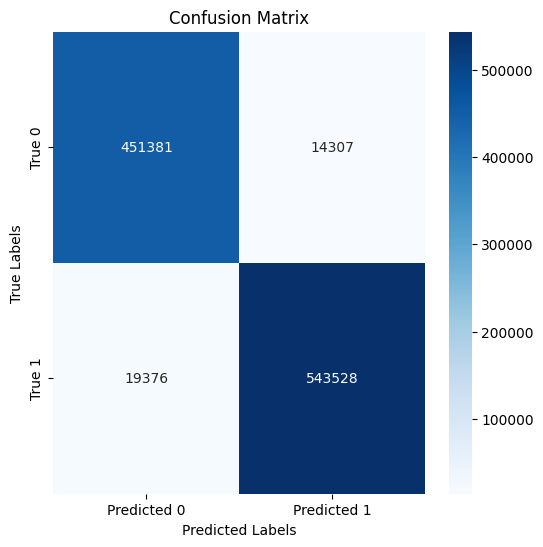

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)  # Make predictions on the test set

# Step 2: Convert predictions to binary class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [30]:
model.evaluate(x_test,y_test)

32144/32144 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9675 - loss: 0.1079 - mcc_metric: 0.9345


[0.10857003927230835, 0.9672532677650452, 0.933934211730957]

In [31]:
x_test_df=test_df[['cap-diameter','cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-height','stem-width','stem-color','has-ring','habitat','season']]
# Fit and transform the data
x_test_df = scaler.fit_transform(x_test_df)

x_test_df

array([[ 0.49809685,  0.87736177, -0.39117569, ...,  1.77700214,
        -0.50686838, -0.95374086],
       [ 0.12673472, -0.63067205, -0.10437928, ..., -0.56278036,
        -0.50686838, -0.95374086],
       [-0.91905518, -1.7616974 , -0.39117569, ..., -0.56278036,
        -0.50686838, -0.04841776],
       ...,
       [-0.12297429,  0.87736177, -1.53836133, ...,  1.77700214,
        -0.50686838, -0.95374086],
       [-0.27237285, -1.7616974 , -0.39117569, ..., -0.56278036,
        -0.50686838, -0.95374086],
       [ 1.96433699, -1.0076805 ,  1.32960277, ..., -0.56278036,
        -0.50686838,  1.76222843]])

In [32]:
y_pred_test_df = model.predict(x_test_df)  # Make predictions on the test set


64937/64937 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step


In [33]:
y_test_pred_binary = (y_pred_test_df > 0.5).astype(int)

In [34]:
submission = pd.DataFrame({
    'id': test_df['id'].values,  
    'Prediction': y_test_pred_binary.flatten() 
})
submission.head()

,id,Prediction
0,3116945,0
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,0


In [35]:
submission['class']=submission['Prediction'].apply(lambda x: 'p' if x else 'e')
submission.head()

,id,Prediction,class
0,3116945,0,e
1,3116946,1,p
2,3116947,1,p
3,3116948,1,p
4,3116949,0,e


In [36]:
submission=submission.drop(['Prediction'],axis=1)
submission.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [37]:
submission.to_csv('submission.csv', index = False)
